<img src="../assets/images/Cover.png" alt="Cover" title="AI2E Cover" />

## AI2E - [Workshop Number] - [Workshop Title] 

Description and motivation of this workshop. 

### Content 
1. Naive Bayes Classification
2. K-NN


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, fetch_20newsgroups
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from random import randint

# Naive Bayes Classification


Naive Bayes is a group of very fast classification algorithms, based on Bayes's theorem

$P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}$

Since what we want is to find the label with maximum probability given a list of features $a_i$, the probability of a given label $y$ can be written as

$P(y|a_1,a_2,...,a_n) = \frac{P(a_1|y)\times P(a_2|y) \times ... \times P(a_n|y) \times P(y)} { P(a_1) \times P(a_2) \times ... \times P(a_n)}$

We notice that the denominator does not depend on $y$, as we are interested in finding the value of $y$ which maximizes the probability, it's enough to maximize the numerator

$y = Argmax_y\{ P(y) \prod_{i=1}^n P(a_i | y) \}$

The term Naive comes from the fact that these algorithms take very naive assumptions on the dataset they are applied on, for example, that the features are independent ($P(a_i,a_j) = P(a_i)P(a_j), \forall i,j \in \{1,...,n\}$).

In the next sections, we'll explore some of the Naive Bayes models, and which assumptions

### Gaussian Naive Bayes

When the features take continuous values (as opposed to discrete), we take the assumption that they are sampled from the [Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution) (or Normal Distribution), and as we know the [probability-density function](https://en.wikipedia.org/wiki/Probability_density_function) of the Gaussian distribution, we calculate probabilities and determine classes.

Let's first generate some data that is classified into four classes, based on two features.

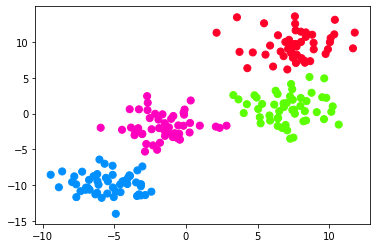

In [3]:
X, y = make_blobs(200, 2, centers=4, random_state=8, cluster_std=1.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='gist_rainbow');

We generate a Gaussian Naive Bayes model

In [4]:
model = GaussianNB()
model.fit(X, y);

We use it to predict the class of new individuals

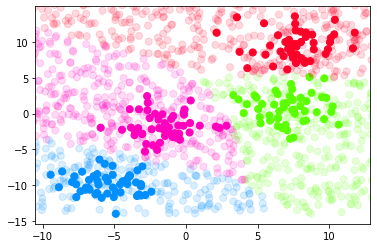

In [5]:
# generate new random data
rng = np.random.RandomState(0)
Xnew = [-14, -14] + [30, 40] * rng.rand(2000, 2)
# predict the classification of the new individuals
ynew = model.predict(Xnew)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='gist_rainbow')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=50, cmap='gist_rainbow', alpha=0.15)
plt.axis(lim);


### Multinomial Naive Bayes

This model is used often to classify text, we now consider that the features are sampled from a Multinomial Distribution, which could be the frequencies of appearance of words for example.

We do the same calculations as above, except that this time, it might be useful to apply logarithms on 

Let's classify articles based on their category (`sports`, `politics` or `tech`).

In [6]:
# lets retrieve dataset categories
categories = [x for x in fetch_20newsgroups().target_names if any(word == x for word in ['rec.sport.baseball', 'talk.politics.misc', 'comp.sys.ibm.pc.hardware'])]
print(categories)

['comp.sys.ibm.pc.hardware', 'rec.sport.baseball', 'talk.politics.misc']


In [7]:
# lets download the datasets
train_data = fetch_20newsgroups(subset='train', categories=categories)
test_data = fetch_20newsgroups(subset='test', categories=categories)
# print sample article
print(train_data.data[1])

From: jamesdon@infoserv.com (James A. Donald)
Subject: Re: "Winning" Tax Case!
Organization: The Liberty Trust
Lines: 22
X-Mailer: TMail version 1.13


> Do you have a strange definition of "winning" that you titled this thread
> "Winning Tax Case!"?  Sloan *lost*.  By a unanimous 3-0 decision that tore
> his arguments to pieces.  He went to prison using these arguments.  See
> United States v Sloan, 939 F2d 499 (7th Cir 1990), aff'g 704 F Supp 880.

The tax protesters are legally correct, but they are put in jail anyway.

The weakness of the governments legal position is shown by the fact that when
someone protesting tax or gun laws on legal grounds gets a federal jury trial
(very rare) the feds blatantly stack the jury, with the same old faces turning
up time after time.

However Teel should have mentioned that though his advice is legally sound, if
you follow it you will probably wind up in jail.

----------------------------------------------------------------------
               

In [8]:
# data goes first through the CountVectorizer, which extracts features as the counts of words
model = make_pipeline(CountVectorizer(), MultinomialNB())
# fit the model
model.fit(train_data.data, train_data.target)

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [9]:
to_predict = ["the RAM memory is limited",
              "The russian foregin minister",
              "The objective of the defensive team is to prevent batters from becoming runners"] # this one from Wikipedia
for individual in to_predict:
    class_id1 = model.predict([individual])
    print("{} =====> {}".format(individual, train_data.target_names[class_id1[0]]))

the RAM memory is limited =====> comp.sys.ibm.pc.hardware
The russian foregin minister =====> talk.politics.misc
The objective of the defensive team is to prevent batters from becoming runners =====> rec.sport.baseball


# K-Nearest Neighbors

K-NN is another popular classification algorithm, albeit a very simple one, it belongs to the supervised set of machine learning algorithms.

The algorithm works by considering the $k$ nearest neighbors to each new individual to be classified, where $k$ is a hyperparameter, the class affected to the individual is the most recurrent class of the neighbors.

(Multiple metric can be used, but the mostly used ones are [Euclidean Distance](https://en.wikipedia.org/wiki/Euclidean_distance) and [Manhattan Distance](https://fr.wikipedia.org/wiki/Distance_de_Manhattan)

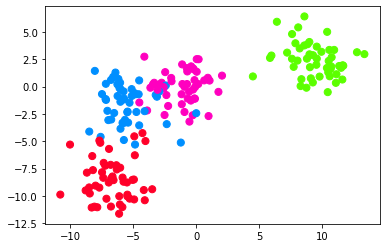

In [10]:
# generate some data, classified into 4 classes, based on two features
X, y = make_blobs(200, 2, centers=4, random_state=3965696633, cluster_std=1.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='gist_rainbow');

<Figure size 432x288 with 0 Axes>

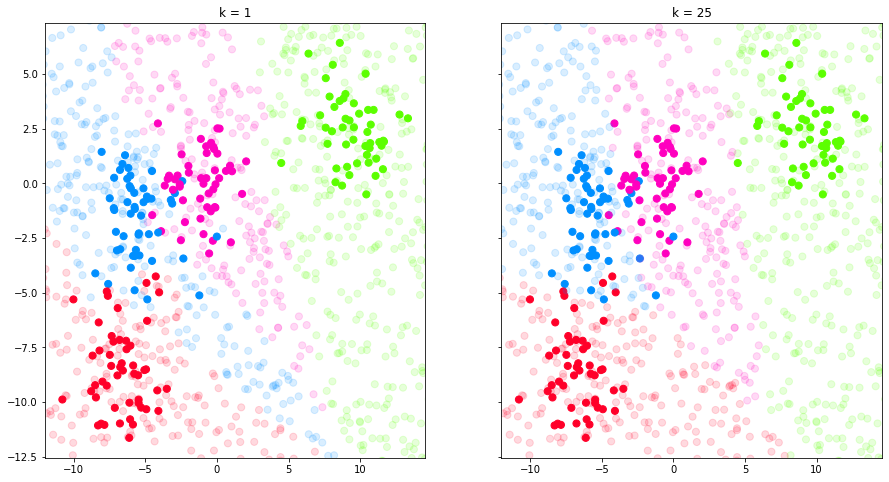

In [11]:
# generate random individuals to classify
rng = np.random.RandomState(0)
Xnew = [-14, -14] + [30, 40] * rng.rand(2000, 2)
# the K values we will try
k_values = [1, 25]
# create two subplots
f = plt.figure()    
f, axes = plt.subplots(nrows = 1, ncols = len(k_values), figsize=(15,8), sharex=True, sharey = True)
# for every K value, try classifying the new individuals with K-NN
for i, k in enumerate(k_values):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    ynew = model.predict(Xnew)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='gist_rainbow')
    axes[i].set_title('k = ' + str(k))
    lim = axes[i].axis()
    axes[i].scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=50, cmap='gist_rainbow', alpha=0.15)
    plt.axis(lim);


### Choosing the right value of `K`

The $k$ hyperparameter plays a key role in the classification process.

- Small values of $k$ make the model more sensitive to noise (as fewer samples are used for classifying data)
- large values of $k$ take the algorithm slower as more computations are needed for visiting neighbors

In order to get a good tradeoff, we can apply validation techniques, which are based on experimentation, such as k-fold cross-validation, we can choose a good value of $k$ either by calculating the misclassification error for each $k$ value, and choosing the $k$ that yields a minimum, or by plotting the accuracy for different values of $k$, and choosing the $k$ that maximizes it.

### Conclusion 

Classification is a very recurring problem in Engineering, whether it's applied to images, text, sound or other datatypes, choosing the right algorithm for the task is very important, moreover, when having large chunks of data, we find ourselves in the obligation to 